In [32]:
# RNN on sine wave, using bp on weight matrix, enforce Dale's law
import numpy as np
import sys
sys.path.append("..")
from rnn_sin3 import RNN
import matplotlib.pyplot as plt
import json
import torch
import torch.nn as nn
import seaborn as sns
from tqdm.notebook import tqdm

In [33]:
# Defining constant
ndata = 400
time_constant = 100  # ms
timestep = 10  # ms
time = ndata * timestep  # ms
num_inputs = 1
num_nodes = 32

# Initializing matrix
connectivity_matrix = np.ones((num_nodes, num_nodes))
# weight_matrix = np.ones((num_nodes, num_nodes))
weight_matrix = np.random.normal(size=(num_nodes, num_nodes))
for i in range(num_nodes):
    weight_matrix[i, i] = 0
    connectivity_matrix[i, i] = 0
init_activations = np.zeros((num_nodes, 1))
# init_activations[0] = 1
init_gain = np.ones((num_nodes, 1))
init_shift = np.zeros((num_nodes, 1))
# output_weight_matrix = np.random.normal(size=(1, num_nodes))/num_nodes
np.random.seed(0)
output_weight_matrix = np.random.normal(size=(1, num_nodes))
# output_weight_matrix = np.ones((1, num_nodes)) / num_nodes * 2

# Create RNN
network = RNN(weight_matrix, connectivity_matrix, init_activations, init_gain, init_shift, output_weight_matrix, 
              time_constant = time_constant, timestep = timestep)

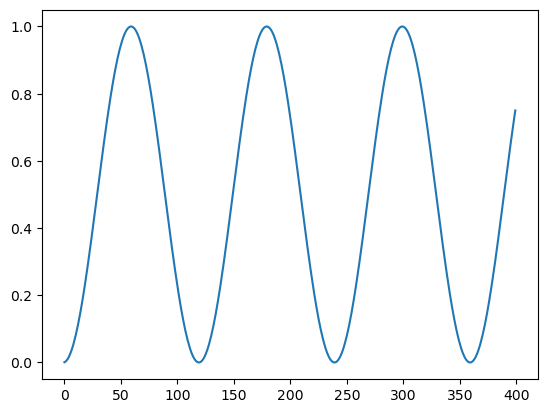

In [34]:
time_points = np.arange(ndata).reshape(-1, 1)
inputs = (1 + np.sin((time_points-30)/60*np.pi))/2
targets = (1 + np.sin((time_points-30+1)/60*np.pi))/2
plt.plot(time_points, targets, label='input')

In [35]:
# training
num_iters = 10000
losses = []

for epoch in tqdm(range(num_iters)):

    loss, _ = network.train_epoch(inputs=inputs, targets=targets, time=time, learning_rate=0.1, mode='weight')
    losses.append(loss)

    # print
    if epoch % 10 == 0:
            print(f'Epoch {epoch+1}/{num_iters}, Loss: {loss}\n')
            print(f"{np.sum(network.weight_matrix.detach().numpy())}")

  0%|          | 0/10000 [00:00<?, ?it/s]

Epoch 1/10000, Loss: 104.95549011230469

-45.82646560668945
Epoch 11/10000, Loss: 0.1622810810804367

-64.37903594970703
Epoch 21/10000, Loss: 0.1527140587568283

-64.47264099121094
Epoch 31/10000, Loss: 0.14473502337932587

-64.61414337158203
Epoch 41/10000, Loss: 0.13826806843280792

-64.77323150634766
Epoch 51/10000, Loss: 0.1329822540283203

-64.93199920654297
Epoch 61/10000, Loss: 0.128567636013031

-65.08251953125
Epoch 71/10000, Loss: 0.12480102479457855

-65.2222671508789
Epoch 81/10000, Loss: 0.12153389304876328

-65.35128784179688
Epoch 91/10000, Loss: 0.11866605281829834

-65.47062683105469
Epoch 101/10000, Loss: 0.11612728238105774

-65.58168029785156
Epoch 111/10000, Loss: 0.11386502534151077

-65.68598937988281
Epoch 121/10000, Loss: 0.11183774471282959

-65.78488159179688
Epoch 131/10000, Loss: 0.11001178622245789

-65.87955474853516
Epoch 141/10000, Loss: 0.10835899412631989

-65.9710922241211
Epoch 151/10000, Loss: 0.106855109333992

-66.06036376953125
Epoch 161/10000,

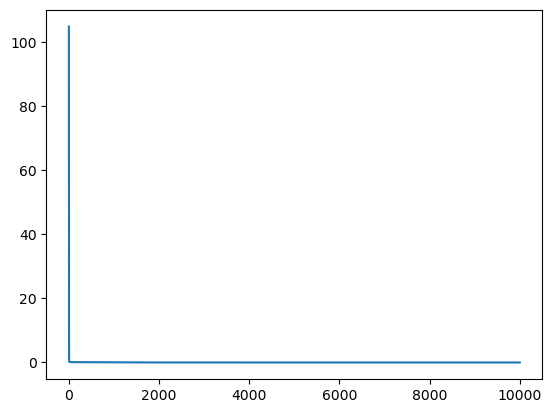

In [39]:
plt.plot(losses)

In [37]:
outputs, activations = network.simulate(time, inputs)

100%|██████████| 400/400 [00:00<00:00, 24914.19it/s]


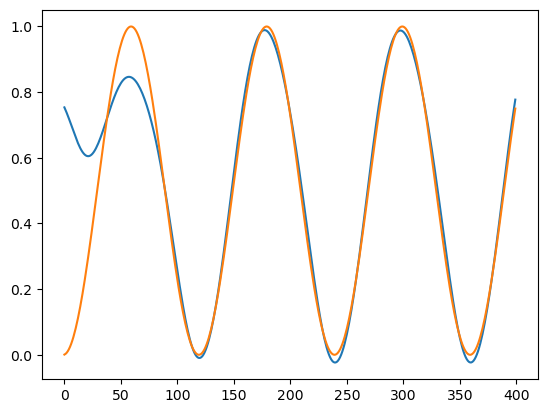

In [38]:
plt.plot(outputs.detach().numpy(), label='output')
plt.plot(targets)